In [1]:
from matplotlib import pyplot as plt

import numpy as np

from mpl_toolkits import mplot3d

from scipy.optimize import minimize

def rosenbrock(x1,x2 = None):
    """
    Rosenbrock function: either support both x1, x2 as 1-d arrays, or x1 as
    2-d array.
    """
    if x2 is None:
        if type(x1) != np.ndarray:
            x1 = np.array(x1)
        if len(x1.shape) == 1:
            x2 = x1[1]
            x1 = x1[0]
        else:
            x2 = x1[:,1]
            x1 = x1[:,0]
    return (x1-1)**2+100*(x2-x1**2)**2

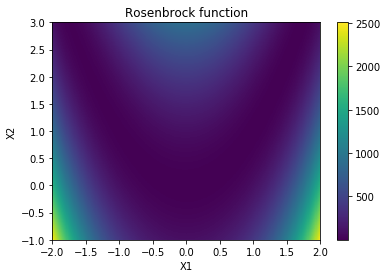

In [2]:
"""
Using pcolormesh
"""

x1 = np.linspace(-2,2,500)
x2 = np.linspace(-1,3,500)
X1,X2 = np.meshgrid(x1,x2)
f = rosenbrock(X1,X2)
f = f[:-1, :-1]
plt.pcolormesh(X1, X2, f)
plt.title('Rosenbrock function')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar()
plt.show()

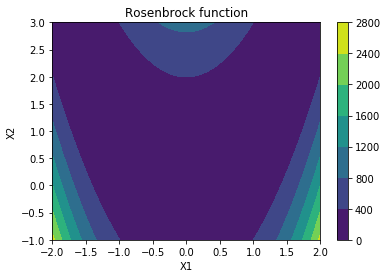

In [3]:
"""
Using contourf
"""

f = rosenbrock(X1,X2)
plt.contourf(X1, X2, f)
plt.title('Rosenbrock function')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar()
plt.show()

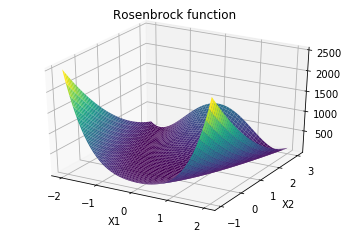

In [4]:
"""
Using surf
"""

ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, f, cmap = 'viridis', edgecolor='none')
ax.set_title('Rosenbrock function')
plt.xticks(np.arange(-2,3,1))
plt.yticks(np.arange(-1,4,1))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [5]:
"""
Minimize Rosenbrock function
"""

def rosenbrock_gra(x):
    """
    Rosenbrock gradient function used in BFGS minimization
    """
    x1_gra = 2*(x[0]-1) - 200*(x[1]-x[0]**2)*2*x[0]
    x2_gra = 200*(x[1]-x[0]**2)
    return np.array([x1_gra,x2_gra])


def get_track(max_iter, init):
    """
    BFGS iteration tracker. Require maximum iterations and initial
    values [x1,x2]. Return max_iter by 2 array and warning message if
    covergence fails.
    """

    init = init
    
    iter_mat = np.append(init, rosenbrock(init))
    
    i = 1
    
    conv = False
    
    while i < max_iter:
        
        if i==1:
            ans = minimize(rosenbrock, iter_mat[0:2], 
                            method = 'BFGS', options = {'maxiter':1},
                            jac = rosenbrock_gra)
            cur_iter = np.concatenate((ans.x,[ans.fun]))
            iter_mat = np.concatenate(([iter_mat],[cur_iter]),axis=0)
        else:
            ans = minimize(rosenbrock, iter_mat[i-1,0:2], 
                            method = 'BFGS', options = {'maxiter':1},
                            jac = rosenbrock_gra)
            cur_iter = np.concatenate((ans.x,[ans.fun]))
            iter_mat = np.concatenate((iter_mat,[cur_iter]),axis=0)
        
        if ans.success == True:
            conv = True
            break
        
        i += 1
    
    if not conv:
        
        print("Did not converge. Try longer iterations.")
        
    return(iter_mat)
    
iter_mat = get_track(1e4, [0,0])

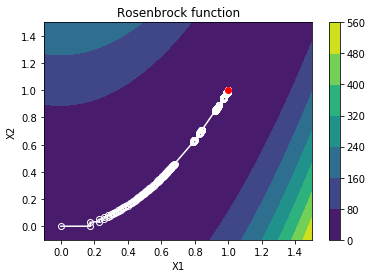

In [6]:
"""
Plotting the iteration path
"""

x1 = np.linspace(-0.1,1.5,100)
x2 = np.linspace(-0.1,1.5,100)
X1,X2 = np.meshgrid(x1,x2)
f = rosenbrock(X1,X2)
plt.contourf(X1, X2, f)
plt.plot(iter_mat[:,0],iter_mat[:,1],'wo-', markerfacecolor = 'none')
plt.plot(iter_mat[iter_mat.shape[0]-1,0],iter_mat[iter_mat.shape[0]-1,1],'ro')
plt.title('Rosenbrock function')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar()
plt.show()